<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Forecast Green Energy</h1>
</div>

Author:- Aniket B. Barphe
    
LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
        
Platform:- JOB-A-THON Analytics Vidhya(November 2022)
    
Problem Statement:- Build a machine learning/deep learning approach to forecast the total energy demand on an hourly basis for the next 3 years based on past trends

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [61]:
# Data manipulation
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import catboost as cb
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Model Evaluations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

CatBoost version 1.1
NumPy version 1.21.5
Pandas version 1.4.2
seaborn version 0.11.2
sklearn version 1.0.1
xgboost version 1.6.2
lightgbm version 3.3.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [62]:
train = pd.read_csv (r'C:\Users\PC\Pictures\AV\JOB-A-THON-Nov2022\train_IxoE5JN.csv')
test = pd.read_csv (r'C:\Users\PC\Pictures\AV\JOB-A-THON-Nov2022\test_WudNWDM.csv')
submission = pd.read_csv (r'C:\Users\PC\Pictures\AV\JOB-A-THON-Nov2022\sample_submission_jn0a7vR.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [63]:

print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB
None 

Shape of Train Data:-

(94992, 3) 

---------------------------------------------------------------------------------------------------------------------

Data Types in Test Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26304 non-null  int64 
 1   datetime  26304 non-null  object
dtypes: int64(1), object(1)
memory usage: 411.1+ KB
None 


Shape of Test Data:-

(26304, 2) 

---------------------------------------------------------------

In [64]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)


About Train Data:-

   row_id             datetime       energy
0       1  2008-03-01 00:00:00  1259.985563
1       2  2008-03-01 01:00:00  1095.541500
2       3  2008-03-01 02:00:00  1056.247500
3       4  2008-03-01 03:00:00  1034.742000
4       5  2008-03-01 04:00:00  1026.334500 

---------------------------------------------------------------------------------------------------------------------

About Test Data:-

   row_id             datetime
0   94993  2019-01-01 00:00:00
1   94994  2019-01-01 01:00:00
2   94995  2019-01-01 02:00:00
3   94996  2019-01-01 03:00:00
4   94997  2019-01-01 04:00:00 

---------------------------------------------------------------------------------------------------------------------

About Submission Data:-

   row_id       energy
0   94993  1702.995014
1   94994  1702.995014
2   94995  1702.995014
3   94996  1702.995014
4   94997  1702.995014 

--------------------------------------------------------------------------------------------------------

In [65]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

       row_id             datetime     energy
94987   94988  2018-12-31 19:00:00  2528.4468
94988   94989  2018-12-31 20:00:00  2461.8836
94989   94990  2018-12-31 21:00:00  2365.9944
94990   94991  2018-12-31 22:00:00  2342.9428
94991   94992  2018-12-31 23:00:00  2180.2176 

---------------------------------------------------------------------------------------------------------------------

About Test Data:-

       row_id             datetime
26299  121292  2021-12-31 19:00:00
26300  121293  2021-12-31 20:00:00
26301  121294  2021-12-31 21:00:00
26302  121295  2021-12-31 22:00:00
26303  121296  2021-12-31 23:00:00 

---------------------------------------------------------------------------------------------------------------------

About Submission Data:-

       row_id       energy
26299  121292  1702.995014
26300  121293  1702.995014
26301  121294  1702.995014
26302  121295  1702.995014
26303  121296  1702.995014 

--------------------------------------------

In [66]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

row_id             datetime        energy
count   94992.000000                94992  93092.000000
unique           NaN                94992           NaN
top              NaN  2008-03-01 00:00:00           NaN
freq             NaN                    1           NaN
mean    47496.500000                  NaN   1702.995014
std     27421.972723                  NaN    369.322103
min         1.000000                  NaN    866.388600
25%     23748.750000                  NaN   1431.541100
50%     47496.500000                  NaN   1654.465800
75%     71244.250000                  NaN   1935.993450
max     94992.000000                  NaN   3374.399600

In [67]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

row_id             datetime
count    26304.000000                26304
unique            NaN                26304
top               NaN  2019-01-01 00:00:00
freq              NaN                    1
mean    108144.500000                  NaN
std       7593.455077                  NaN
min      94993.000000                  NaN
25%     101568.750000                  NaN
50%     108144.500000                  NaN
75%     114720.250000                  NaN
max     121296.000000                  NaN

In [68]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




Missing Values  Percentage Missing Values
row_id                 0                   0.000000
datetime               0                   0.000000
energy              1900                   2.000168

In [69]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




Missing Values  Percentage Missing Values
row_id                 0                        0.0
datetime               0                        0.0

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Sort by date & time
- Deduplicating
- Extracting Time Features

#### * Sort by date & time

In [70]:
print('-------------'*9)
train['datetime'] = pd.to_datetime(train['datetime'])
train.sort_values(by=['datetime'], axis=0, ascending=True, inplace=True)
train.reset_index(inplace=True, drop=True)


---------------------------------------------------------------------------------------------------------------------


#### * Deduplicating

In [71]:
print('-------------'*9)
train.drop_duplicates(subset='datetime', keep='last', inplace=True)
#Data deduplication is a process that eliminates excessive copies of data and 
#significantly decreases storage capacity requirements.

---------------------------------------------------------------------------------------------------------------------


#### * Extracting Time Features

In [72]:
train = train.set_index('datetime')
train['dow'] = train.index.dayofweek #Day of Week
train['doy'] = train.index.dayofyear #Day of Year
train['year'] = train.index.year #Year
train['month'] = train.index.month #Month
train['quarter'] = train.index.quarter #Quarter
train['hour'] = train.index.hour #Hour
train['woy'] = train.index.weekofyear #Week of Year
train['dom'] = train.index.day # Day of Month
train['date'] = train.index.date #Date
train['season'] = train['month'].apply(lambda month_number: (month_number%12 + 3)//3) #Season

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

- Sort by date & time
- Deduplicating
- Extracting Time Features

#### * Sort by date & time

In [73]:
print('-------------'*9)
test['datetime'] = pd.to_datetime(test['datetime'])
test.sort_values(by=['datetime'], axis=0, ascending=True, inplace=True)
test.reset_index(inplace=True, drop=True)

---------------------------------------------------------------------------------------------------------------------


#### * Deduplicating

In [74]:
print('-------------'*9)
test.drop_duplicates(subset='datetime', keep='last', inplace=True)

---------------------------------------------------------------------------------------------------------------------


#### * Extracting Time Features

In [75]:
test = test.set_index('datetime')
test['dow'] = test.index.dayofweek #Day of Week
test['doy'] = test.index.dayofyear #Day of Year
test['year'] = test.index.year #Year
test['month'] = test.index.month #Month
test['quarter'] = test.index.quarter #Quarter
test['hour'] = test.index.hour #Hour
test['woy'] = test.index.weekofyear #Week of Year
test['dom'] = test.index.day # Day of Month
test['date'] = test.index.date #Date
test['season'] = test['month'].apply(lambda month_number: (month_number%12 + 3)//3) #Season

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [76]:
train.isnull().sum()

row_id        0
energy     1900
dow           0
doy           0
year          0
month         0
quarter       0
hour          0
woy           0
dom           0
date          0
season        0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in Train DataSet</h2>
</div>


#### * Imputation of "energy" Variable

In [77]:
train['energy'].interpolate(method='linear', inplace=True)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [78]:
test.isnull().sum()

row_id     0
dow        0
doy        0
year       0
month      0
quarter    0
hour       0
woy        0
dom        0
date       0
season     0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Check distribution of Target Variable
- Energy Demand over time
- Median Hourly Energy Demand per Season
- Median Hourly Energy Demand per Season

#### * Check distribution of Target Variable

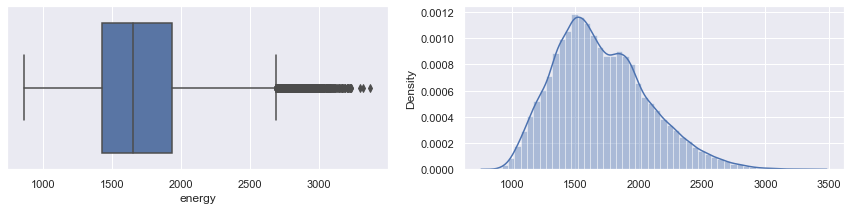

In [79]:
# setup figure size
plt.subplots(figsize=(15,3))

# boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='energy', data=train);

# distplot
plt.subplot(1, 2, 2)
sns.distplot(x=train['energy']);

#### * Energy Demand over time

In [80]:
# As "Plotly" does not allow to access index & Hence copying it into another column
train['date_and_time'] = train.index

#Plot Energy Demand over time
fig = px.line(train,x='date_and_time',y='energy',
              title=f'Energy Demand over time [{min(train.year)} - {max(train.year)}]')
fig.update_traces(line=dict(width=0.06))
fig.update_layout(xaxis_title='Date & Time',yaxis_title='Energy Demand')
fig.show()

#Ref:-https://www.kaggle.com/code/robinteuwens/forecasting-energy-demand/notebook

#### * Median Hourly Energy Demand per Season

In [81]:
# aggregated data
_ = train\
    .groupby(['hour', 'season'], as_index=False)\
    .agg({'energy':'median'})

# plotting
fig = px.line(_,
              x='hour', 
              y='energy', 
              color='season', 
              title='Median Hourly Energy Demand per Season')
fig.update_layout(xaxis_title='Hour',
                  yaxis_title='Energy Demand')
fig.show()

#### * Check distribution of Distribution of Energy Demand over years

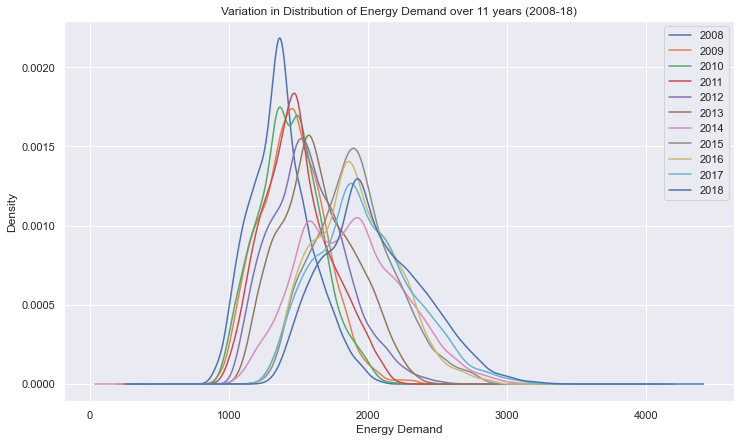

In [82]:
for year in train['year'].unique():
    train[train['year'] == year]['energy'].plot(kind='density', figsize = (12,7), legend = True, label = year)
_ = plt.xlabel('Energy Demand')
_ = plt.title('Variation in Distribution of Energy Demand over 11 years (2008-18)')

#Ref:- https://github.com/pratha19/Hourly_Energy_Consumption_Prediction/blob/master/SDGE_energy_EDA.ipynb

#### * Check the correlation

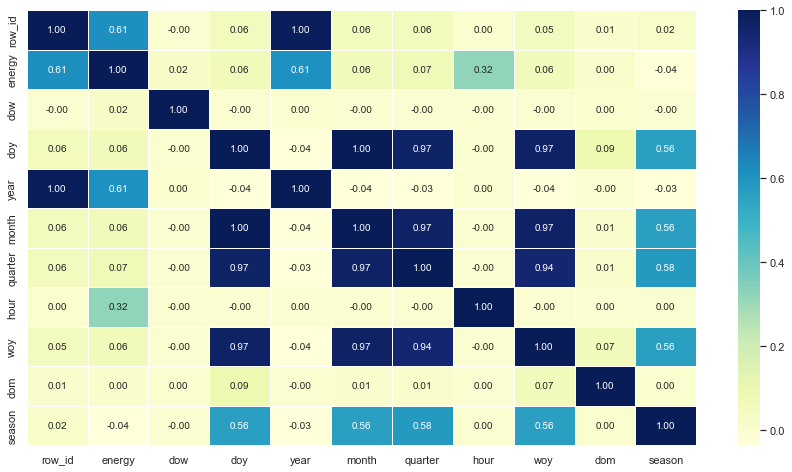

In [83]:
fig , ax = plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5);

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [84]:
train = train.drop(['date','month','season','date_and_time'],axis=1)
print('-------------'*9)
test = test.drop(['date','month','season'],axis=1)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94992 entries, 2008-03-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   row_id   94992 non-null  int64  
 1   energy   94992 non-null  float64
 2   dow      94992 non-null  int64  
 3   doy      94992 non-null  int64  
 4   year     94992 non-null  int64  
 5   quarter  94992 non-null  int64  
 6   hour     94992 non-null  int64  
 7   woy      94992 non-null  int64  
 8   dom      94992 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 7.2 MB


In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2019-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   row_id   26304 non-null  int64
 1   dow      26304 non-null  int64
 2   doy      26304 non-null  int64
 3   year     26304 non-null  int64
 4   quarter  26304 non-null  int64
 5   hour     26304 non-null  int64
 6   woy      26304 non-null  int64
 7   dom      26304 non-null  int64
dtypes: int64(8)
memory usage: 1.8 MB


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing and Model Building</h2>
</div>

- Model wise seperate data preprocessing
- Building ML model to predict "Energy Demand"

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- XGB Regressor</h2>
</div>

Accuracy of XGB Regressor on training set: 1.00
Accuracy of XGB Regressor on test set: 0.99


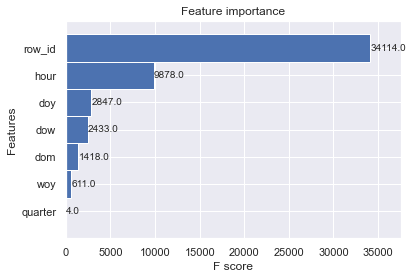

In [87]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.001,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model1 = xgb.XGBRegressor(n_estimators=1000, random_state = 0)

# e) Fit the model
model1.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of XGB Regressor on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))

# h) Check Feature Importance of XGB Regressor
xgb.plot_importance(model1, height=1.0);

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Fitting XGB Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [88]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model2 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,colsample_bylevel=1
                          ,colsample_bynode=1, colsample_bytree=1,early_stopping_rounds=None
                          ,enable_categorical=False,eval_metric=None, gamma=0, gpu_id=-1
                          ,grow_policy='depthwise', importance_type=None, interaction_constraints=''
                          ,learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,max_delta_step=0
                          ,max_depth=15, max_leaves=0, min_child_weight=3,monotone_constraints='()'
                          ,n_estimators=1500,n_jobs=0, num_parallel_tree=1, predictor='auto'
                          ,random_state=0,reg_alpha=0, reg_lambda=1)

# e) Fit the model
model2.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of XGB Regressor(Best Parameter) on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of XGB Regressor(Best Parameter) on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))

Accuracy of XGB Regressor(Best Parameter) on training set: 1.00
Accuracy of XGB Regressor(Best Parameter) on test set: 1.00


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Linear Regression</h2>
</div>

In [89]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model3 = LinearRegression()

# e) Fit the model
model3.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))

Accuracy of Linear Regression on training set: 0.48
Accuracy of Linear Regression on test set: 0.46


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Decision Tree Regressor</h2>
</div>

In [90]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model4 = DecisionTreeRegressor(random_state=42)

# e) Fit the model
model4.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Decision Tree Regressor on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Decision Tree Regressor on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))

Accuracy of Decision Tree Regressor on training set: 1.00
Accuracy of Decision Tree Regressor on test set: 0.97


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Support Vector Regression</h2>
</div>

In [91]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model5 = SVR(kernel = 'rbf')

# e) Fit the model
model5.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Support Vector Regression on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Support Vector Regression on test set: {:.2f}'
     .format(model5.score(X_test, y_test)))

Accuracy of Support Vector Regression on training set: 0.38
Accuracy of Support Vector Regression on test set: 0.37


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Random Forest Regressor</h2>
</div>

In [92]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.001,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model6 = RandomForestRegressor(random_state = 0)

# e) Fit the model
model6.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Random Forest Regressor on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))

Accuracy of Random Forest Regressor on training set: 1.00
Accuracy of Random Forest Regressor on test set: 0.99


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Fitting Random Forest Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [93]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.1,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model7 = RandomForestRegressor(n_estimators = 400,min_samples_split = 2,min_samples_leaf = 1
                               ,max_features = 'sqrt',bootstrap = False, random_state = 11)

# e) Fit the model
model7.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Random Forest Regressor(Best Parameter) on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Random Forest Regressor(Best Parameter) on test set: {:.2f}'
     .format(model7.score(X_test, y_test)))

Accuracy of Random Forest Regressor(Best Parameter) on training set: 1.00
Accuracy of Random Forest Regressor(Best Parameter) on test set: 0.99


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Cat Boost Regressor</h2>
</div>

In [94]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model8 = CatBoostRegressor(random_state = 0)

# e) Fit the model
model8.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(model8.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Cat Boost Regressor on test set: {:.2f}'
     .format(model8.score(X_test, y_test)))

Learning rate set to 0.083939
0:	learn: 349.9890831	total: 7s	remaining: 1h 56m 32s
1:	learn: 332.3691592	total: 8.01s	remaining: 1h 6m 35s
2:	learn: 316.7852645	total: 8.1s	remaining: 44m 51s
3:	learn: 302.3582331	total: 8.12s	remaining: 33m 42s
4:	learn: 289.1383779	total: 8.14s	remaining: 27m
5:	learn: 278.1632644	total: 8.16s	remaining: 22m 31s
6:	learn: 268.5965006	total: 8.18s	remaining: 19m 19s
7:	learn: 259.0806140	total: 8.19s	remaining: 16m 56s
8:	learn: 250.4058165	total: 8.21s	remaining: 15m 4s
9:	learn: 242.3759781	total: 8.23s	remaining: 13m 34s
10:	learn: 236.0176897	total: 8.25s	remaining: 12m 21s
11:	learn: 229.0920983	total: 8.27s	remaining: 11m 20s
12:	learn: 223.9417831	total: 8.28s	remaining: 10m 28s
13:	learn: 219.3750241	total: 8.3s	remaining: 9m 44s
14:	learn: 213.8607133	total: 8.32s	remaining: 9m 6s
15:	learn: 208.7233951	total: 8.34s	remaining: 8m 32s
16:	learn: 205.1364561	total: 8.35s	remaining: 8m 3s
17:	learn: 201.0722153	total: 8.37s	remaining: 7m 36s
18

161:	learn: 125.7163192	total: 17.2s	remaining: 1m 29s
162:	learn: 125.5686133	total: 17.3s	remaining: 1m 28s
163:	learn: 125.4187258	total: 17.3s	remaining: 1m 28s
164:	learn: 125.3179430	total: 17.3s	remaining: 1m 27s
165:	learn: 125.2134384	total: 17.6s	remaining: 1m 28s
166:	learn: 125.0899436	total: 17.6s	remaining: 1m 27s
167:	learn: 124.9645551	total: 17.6s	remaining: 1m 27s
168:	learn: 124.8338437	total: 17.7s	remaining: 1m 26s
169:	learn: 124.6419282	total: 17.7s	remaining: 1m 26s
170:	learn: 124.5358750	total: 17.7s	remaining: 1m 25s
171:	learn: 124.4312119	total: 17.8s	remaining: 1m 25s
172:	learn: 124.3073088	total: 17.8s	remaining: 1m 25s
173:	learn: 124.1770046	total: 17.9s	remaining: 1m 24s
174:	learn: 124.0582521	total: 17.9s	remaining: 1m 24s
175:	learn: 123.9589355	total: 17.9s	remaining: 1m 23s
176:	learn: 123.8306213	total: 17.9s	remaining: 1m 23s
177:	learn: 123.7165649	total: 17.9s	remaining: 1m 22s
178:	learn: 123.5955941	total: 17.9s	remaining: 1m 22s
179:	learn

319:	learn: 109.7089507	total: 21.9s	remaining: 46.4s
320:	learn: 109.6637136	total: 21.9s	remaining: 46.3s
321:	learn: 109.6043829	total: 21.9s	remaining: 46.1s
322:	learn: 109.4690053	total: 21.9s	remaining: 45.9s
323:	learn: 109.4222208	total: 21.9s	remaining: 45.8s
324:	learn: 109.3537598	total: 22s	remaining: 45.6s
325:	learn: 109.2640469	total: 22s	remaining: 45.5s
326:	learn: 109.2092795	total: 22.1s	remaining: 45.5s
327:	learn: 109.1598922	total: 22.1s	remaining: 45.4s
328:	learn: 109.1135589	total: 22.2s	remaining: 45.2s
329:	learn: 109.0541753	total: 22.2s	remaining: 45s
330:	learn: 109.0061096	total: 22.2s	remaining: 44.9s
331:	learn: 108.9616869	total: 22.2s	remaining: 44.7s
332:	learn: 108.9095823	total: 22.2s	remaining: 44.5s
333:	learn: 108.8508422	total: 22.3s	remaining: 44.4s
334:	learn: 108.8000889	total: 22.3s	remaining: 44.2s
335:	learn: 108.7502002	total: 22.3s	remaining: 44.1s
336:	learn: 108.6870032	total: 22.3s	remaining: 43.9s
337:	learn: 108.6102167	total: 22.

478:	learn: 100.0053904	total: 26.1s	remaining: 28.4s
479:	learn: 99.9455409	total: 26.2s	remaining: 28.3s
480:	learn: 99.9019385	total: 26.2s	remaining: 28.2s
481:	learn: 99.8442818	total: 26.2s	remaining: 28.2s
482:	learn: 99.7858024	total: 26.2s	remaining: 28.1s
483:	learn: 99.7285451	total: 26.2s	remaining: 28s
484:	learn: 99.6733433	total: 26.2s	remaining: 27.9s
485:	learn: 99.5809136	total: 26.3s	remaining: 27.8s
486:	learn: 99.5053010	total: 26.3s	remaining: 27.7s
487:	learn: 99.4743289	total: 26.3s	remaining: 27.6s
488:	learn: 99.4216151	total: 26.3s	remaining: 27.5s
489:	learn: 99.3733422	total: 26.5s	remaining: 27.6s
490:	learn: 99.3480204	total: 26.6s	remaining: 27.5s
491:	learn: 99.3008625	total: 26.6s	remaining: 27.4s
492:	learn: 99.2093013	total: 26.6s	remaining: 27.3s
493:	learn: 99.1888322	total: 26.6s	remaining: 27.3s
494:	learn: 99.0966274	total: 26.6s	remaining: 27.2s
495:	learn: 99.0067892	total: 26.6s	remaining: 27.1s
496:	learn: 98.9625291	total: 26.7s	remaining: 

645:	learn: 92.7115000	total: 30.3s	remaining: 16.6s
646:	learn: 92.6939886	total: 30.3s	remaining: 16.5s
647:	learn: 92.6633455	total: 30.3s	remaining: 16.5s
648:	learn: 92.6455594	total: 30.3s	remaining: 16.4s
649:	learn: 92.6107410	total: 30.3s	remaining: 16.3s
650:	learn: 92.5847088	total: 30.3s	remaining: 16.3s
651:	learn: 92.5406939	total: 30.4s	remaining: 16.2s
652:	learn: 92.5190180	total: 30.4s	remaining: 16.1s
653:	learn: 92.4639210	total: 30.4s	remaining: 16.1s
654:	learn: 92.4322273	total: 30.4s	remaining: 16s
655:	learn: 92.3983398	total: 30.4s	remaining: 16s
656:	learn: 92.3830595	total: 30.5s	remaining: 15.9s
657:	learn: 92.3513637	total: 30.5s	remaining: 15.8s
658:	learn: 92.3060215	total: 30.5s	remaining: 15.8s
659:	learn: 92.2492183	total: 30.5s	remaining: 15.7s
660:	learn: 92.2203780	total: 30.5s	remaining: 15.7s
661:	learn: 92.2035877	total: 30.5s	remaining: 15.6s
662:	learn: 92.1699189	total: 30.6s	remaining: 15.5s
663:	learn: 92.1620227	total: 30.6s	remaining: 15.

805:	learn: 87.3124836	total: 33.3s	remaining: 8.03s
806:	learn: 87.2882563	total: 33.4s	remaining: 7.98s
807:	learn: 87.2579882	total: 33.4s	remaining: 7.93s
808:	learn: 87.2378738	total: 33.4s	remaining: 7.88s
809:	learn: 87.1587438	total: 33.4s	remaining: 7.84s
810:	learn: 87.1322518	total: 33.4s	remaining: 7.79s
811:	learn: 87.1109307	total: 33.4s	remaining: 7.74s
812:	learn: 87.0830304	total: 33.5s	remaining: 7.7s
813:	learn: 87.0653996	total: 33.5s	remaining: 7.65s
814:	learn: 87.0415929	total: 33.5s	remaining: 7.61s
815:	learn: 87.0034876	total: 33.5s	remaining: 7.56s
816:	learn: 86.9629336	total: 33.6s	remaining: 7.52s
817:	learn: 86.9451636	total: 33.6s	remaining: 7.47s
818:	learn: 86.9146137	total: 33.6s	remaining: 7.42s
819:	learn: 86.8664569	total: 33.6s	remaining: 7.38s
820:	learn: 86.8366249	total: 33.6s	remaining: 7.33s
821:	learn: 86.8133079	total: 33.6s	remaining: 7.29s
822:	learn: 86.7877062	total: 33.7s	remaining: 7.24s
823:	learn: 86.7461490	total: 33.7s	remaining: 

967:	learn: 82.9641573	total: 37.7s	remaining: 1.25s
968:	learn: 82.9480207	total: 37.8s	remaining: 1.21s
969:	learn: 82.9302737	total: 37.8s	remaining: 1.17s
970:	learn: 82.9006256	total: 37.8s	remaining: 1.13s
971:	learn: 82.8738080	total: 37.8s	remaining: 1.09s
972:	learn: 82.8529475	total: 37.9s	remaining: 1.05s
973:	learn: 82.8099371	total: 37.9s	remaining: 1.01s
974:	learn: 82.7991612	total: 37.9s	remaining: 972ms
975:	learn: 82.7797708	total: 37.9s	remaining: 933ms
976:	learn: 82.7554013	total: 37.9s	remaining: 893ms
977:	learn: 82.7316401	total: 38s	remaining: 854ms
978:	learn: 82.6990654	total: 38s	remaining: 815ms
979:	learn: 82.6880147	total: 38s	remaining: 776ms
980:	learn: 82.6741432	total: 38s	remaining: 736ms
981:	learn: 82.6580012	total: 38s	remaining: 697ms
982:	learn: 82.6265134	total: 38.1s	remaining: 658ms
983:	learn: 82.5929238	total: 38.1s	remaining: 619ms
984:	learn: 82.5703170	total: 38.1s	remaining: 580ms
985:	learn: 82.5267091	total: 38.1s	remaining: 542ms
986

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- Fitting Cat Boost Regressor Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [95]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.1,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model9 = CatBoostRegressor(depth = 12, iterations = 400, l2_leaf_reg = 0.1,learning_rate = 0.02,random_state = 0)

# e) Fit the model
model9.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Cat Boost Regressor(Best Parameter) on training set: {:.2f}'
     .format(model9.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Cat Boost Regressor(Best Parameter) on test set: {:.2f}'
     .format(model9.score(X_test, y_test)))

0:	learn: 363.8859841	total: 4.71s	remaining: 31m 19s
1:	learn: 358.2895715	total: 5.29s	remaining: 17m 31s
2:	learn: 352.9321165	total: 5.61s	remaining: 12m 22s
3:	learn: 347.6863042	total: 5.87s	remaining: 9m 40s
4:	learn: 342.5520752	total: 6.19s	remaining: 8m 9s
5:	learn: 337.5740175	total: 6.31s	remaining: 6m 54s
6:	learn: 332.6623063	total: 6.42s	remaining: 6m
7:	learn: 327.8374463	total: 6.64s	remaining: 5m 25s
8:	learn: 323.1464900	total: 6.79s	remaining: 4m 55s
9:	learn: 318.5386715	total: 6.91s	remaining: 4m 29s
10:	learn: 313.9619436	total: 7.07s	remaining: 4m 9s
11:	learn: 309.6231527	total: 7.19s	remaining: 3m 52s
12:	learn: 305.2868410	total: 7.3s	remaining: 3m 37s
13:	learn: 301.2161254	total: 7.41s	remaining: 3m 24s
14:	learn: 297.1061697	total: 7.52s	remaining: 3m 13s
15:	learn: 293.1140790	total: 7.69s	remaining: 3m 4s
16:	learn: 289.2394755	total: 7.86s	remaining: 2m 57s
17:	learn: 285.4014559	total: 7.97s	remaining: 2m 49s
18:	learn: 281.7089723	total: 8.12s	remaini

156:	learn: 136.0546154	total: 25.5s	remaining: 39.5s
157:	learn: 135.7455454	total: 25.6s	remaining: 39.2s
158:	learn: 135.4613994	total: 25.7s	remaining: 39s
159:	learn: 135.2168625	total: 25.8s	remaining: 38.7s
160:	learn: 134.9424025	total: 26s	remaining: 38.6s
161:	learn: 134.7437657	total: 26.1s	remaining: 38.3s
162:	learn: 134.5259252	total: 26.2s	remaining: 38.1s
163:	learn: 134.2363007	total: 26.3s	remaining: 37.9s
164:	learn: 134.0202828	total: 26.4s	remaining: 37.6s
165:	learn: 133.8127005	total: 26.5s	remaining: 37.4s
166:	learn: 133.6295789	total: 26.6s	remaining: 37.1s
167:	learn: 133.4038614	total: 26.7s	remaining: 36.9s
168:	learn: 133.2000394	total: 26.8s	remaining: 36.6s
169:	learn: 133.0101209	total: 27s	remaining: 36.6s
170:	learn: 132.8312941	total: 27.2s	remaining: 36.4s
171:	learn: 132.5602029	total: 27.3s	remaining: 36.2s
172:	learn: 132.3383745	total: 27.4s	remaining: 35.9s
173:	learn: 132.0658804	total: 27.5s	remaining: 35.7s
174:	learn: 131.8616750	total: 28.

309:	learn: 113.0553171	total: 48.3s	remaining: 14s
310:	learn: 112.9324348	total: 48.4s	remaining: 13.9s
311:	learn: 112.8238882	total: 48.5s	remaining: 13.7s
312:	learn: 112.7234455	total: 48.6s	remaining: 13.5s
313:	learn: 112.6295345	total: 48.8s	remaining: 13.4s
314:	learn: 112.5625563	total: 48.9s	remaining: 13.2s
315:	learn: 112.4671470	total: 49s	remaining: 13s
316:	learn: 112.3947337	total: 49.1s	remaining: 12.9s
317:	learn: 112.3129786	total: 49.2s	remaining: 12.7s
318:	learn: 112.2116819	total: 49.3s	remaining: 12.5s
319:	learn: 112.1281833	total: 49.4s	remaining: 12.3s
320:	learn: 111.9884823	total: 49.6s	remaining: 12.2s
321:	learn: 111.8952851	total: 49.7s	remaining: 12s
322:	learn: 111.7980753	total: 49.8s	remaining: 11.9s
323:	learn: 111.7397954	total: 49.9s	remaining: 11.7s
324:	learn: 111.6484789	total: 50s	remaining: 11.5s
325:	learn: 111.5460621	total: 50.1s	remaining: 11.4s
326:	learn: 111.4700128	total: 50.2s	remaining: 11.2s
327:	learn: 111.3651161	total: 50.3s	r

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Light Gradient Boosted Machine(LGBM) Regressor</h2>
</div>

In [96]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.0001,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model10 = LGBMRegressor(random_state = 0)

# e) Fit the model
model10.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(model10.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of LGBM Regressor on test set: {:.2f}'
     .format(model10.score(X_test, y_test)))

Accuracy of LGBM Regressor on training set: 0.92
Accuracy of LGBM Regressor on test set: 0.94


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- Fitting LGBM Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [109]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.00001,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model11 = LGBMRegressor(colsample_bytree=0.5,random_state = 89)

# e) Fit the model
model11.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of LGBM Regressor(Best Parameter) on training set: {:.2f}'
     .format(model11.score(X_train, y_train)))

Accuracy of LGBM Regressor(Best Parameter) on training set: 0.92


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Gradient Boosting Regressor</h2>
</div>

In [98]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.1,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model12 = GradientBoostingRegressor(random_state = 0)

# e) Fit the model
model12.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(model12.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Gradient Boosting Regressor on test set: {:.2f}'
     .format(model12.score(X_test, y_test)))

Accuracy of Gradient Boosting Regressor on training set: 0.85
Accuracy of Gradient Boosting Regressor on test set: 0.84


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- Fitting Gradient Boosting Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [99]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model13 = GradientBoostingRegressor(learning_rate=0.08697490026177834, max_features=0.6,random_state = 38)

# e) Fit the model
model13.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Gradient Boosting Regressor(Best Parameter) on training set: {:.2f}'
     .format(model13.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Gradient Boosting Regressor(Best Parameter) on test set: {:.2f}'
     .format(model13.score(X_test, y_test)))

Accuracy of Gradient Boosting Regressor(Best Parameter) on training set: 0.83
Accuracy of Gradient Boosting Regressor(Best Parameter) on test set: 0.82


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Lasso Regression</h2>
</div>

In [100]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model14 = Lasso() 

# e) Fit the model
model14.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Lasso Regression on training set: {:.2f}'
     .format(model14.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Lasso Regression on test set: {:.2f}'
     .format(model14.score(X_test, y_test)))

Accuracy of Lasso Regression on training set: 0.48
Accuracy of Lasso Regression on test set: 0.46


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- Ridge Regression</h2>
</div>

In [101]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.1,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model15 = Ridge() 

# e) Fit the model
model15.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(model15.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(model15.score(X_test, y_test)))

Accuracy of Ridge Regressor on training set: 0.48
Accuracy of Ridge Regressor on test set: 0.47


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 16- Histogram Gradient Boosting Regression</h2>
</div>

In [102]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.1,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model16 = HistGradientBoostingRegressor(random_state = 42) 

# e) Fit the model
model16.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(model16.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Hist Gradient Boosting Regressor on test set: {:.2f}'
     .format(model16.score(X_test, y_test)))

Accuracy of Hist Gradient Boosting Regressor on training set: 0.92
Accuracy of Hist Gradient Boosting Regressor on test set: 0.91


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 17- Fitting Histogram Gradient Boosting Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

In [103]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model17 = HistGradientBoostingRegressor(learning_rate=0.1,random_state = 42) 

# e) Fit the model
model17.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Hist Gradient Boosting Regressor(Best Parameter) on training set: {:.2f}'
     .format(model17.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Hist Gradient Boosting Regressor(Best Parameter) on test set: {:.2f}'
     .format(model17.score(X_test, y_test)))

Accuracy of Hist Gradient Boosting Regressor(Best Parameter) on training set: 0.92
Accuracy of Hist Gradient Boosting Regressor(Best Parameter) on test set: 0.90


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 18- Elastic Net</h2>
</div>

In [104]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.1,random_state=0)

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns);label='energy';features.remove(label)

# c) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features];y_train=train_temp[label]
X_test=test_temp[features];y_test=test_temp[label]

# d) Model Initiation
model18 = ElasticNet()

# e) Fit the model
model18.fit(X_train, y_train)

# f) Calculate algorithm training fit score
print('Accuracy of Elastic Net on training set: {:.2f}'
     .format(model18.score(X_train, y_train)))

# g) Calculate algorithm test fit score
print('Accuracy of Elastic Net on test set: {:.2f}'
     .format(model18.score(X_test, y_test)))

Accuracy of Elastic Net on training set: 0.48
Accuracy of Elastic Net on test set: 0.47


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [107]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict(x) #RMSE = 305.123678987
# Prediction using Model 2
y_pred2 = model2.predict(x) #RMSE = 287.7209016193958
# Prediction using Model 3
y_pred3 = model3.predict(x) #RMSE = 374.6645411766115
# Prediction using Model 4
y_pred4 = model4.predict(x) #RMSE = 330.60393883770666
# Prediction using Model 5
y_pred5 = model5.predict(x) #RMSE = 468.87148496643937
# Prediction using Model 6
y_pred6 = model6.predict(x) #RMSE = 300.2002550733575 
# Prediction using Model 7
y_pred7 = model7.predict(x) #RMSE = 308.9025296124432
# Prediction using Model 8
y_pred8 = model8.predict(x) #RMSE = 293.37082518949825
# Prediction using Model 9
y_pred9 = model9.predict(x) #RMSE = 296.01838045162316
# Prediction using Model 10
y_pred10 = model10.predict(x) #RMSE = 276.5110835332869
# Prediction using Model 11
y_pred11 = model11.predict(x) #RMSE = 261.10074161981254
# Prediction using Model 12
y_pred12 = model12.predict(x) #RMSE = 293.82976207495926
# Prediction using Model 13
y_pred13 = model13.predict(x) #RMSE = 303.40825160767383
# Prediction using Model 14
y_pred14 = model14.predict(x) #RMSE = 374.48545644383404
# Prediction using Model 15
y_pred15 = model15.predict(x) #RMSE = 374.4306322422807
# Prediction using Model 16
y_pred16 = model16.predict(x) #RMSE = 298.5393827933832
# Prediction using Model 17
y_pred17 = model17.predict(x) #RMSE = 278.1791451539993
# Prediction using Model 18
y_pred18 = model18.predict(x) #RMSE = 374.8764741306712

# Final Prediction using Ensemble Technique
y_pred = (0.3*y_pred10 + 0.4*y_pred11 + 0.3*y_pred17) 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [108]:
df1=pd.DataFrame(y_pred,columns=['energy'])
submission1 = submission.drop(['energy'], axis=1)
final_pred = pd.concat([submission1,df1], axis=1) 
final_pred.to_csv(r'C:\Users\PC\Pictures\AV\JOB-A-THON-Nov2022\Best_Final_Submission_JTHON2022_Aniiket_Barphe.csv',index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission Score:-**

**1) Public Leaderboard :-** 261.1007416191

**2) Private Leaderboard :-** 486.5502581873

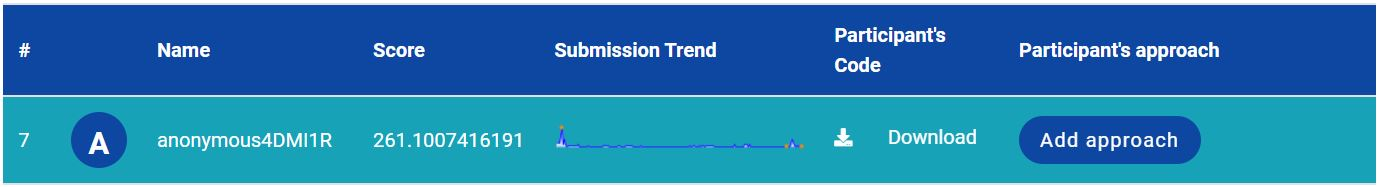

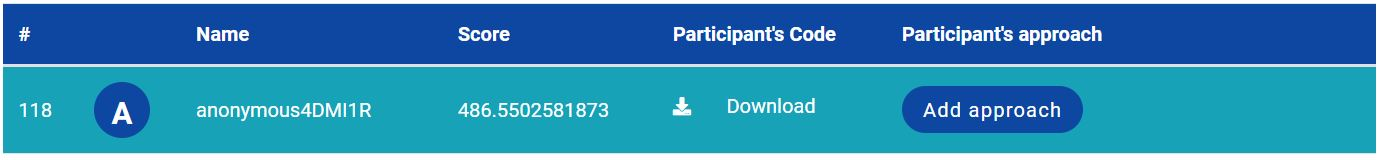

**Competition Link:-** https://datahack.analyticsvidhya.com/contest/job-a-thon-november-2022/#LeaderBoard

**Rank Scored:-**

a) **07** out of **6388** registered participants (Public Leaderboard)

b) **118** out of **6388** registered participants (Private Leaderboard)